## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Datasets

In [2]:
df_india = pd.read_csv('Unemployment in India.csv')
df_rate_2020 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

df_india.columns = df_india.columns.str.strip()
df_rate_2020.columns = df_rate_2020.columns.str.strip()

df_india['Date'] = df_india['Date'].str.strip()
df_rate_2020['Date'] = df_rate_2020['Date'].str.strip()

df_india['Date'] = pd.to_datetime(df_india['Date'], format='%d-%m-%Y', dayfirst=True)
df_rate_2020['Date'] = pd.to_datetime(df_rate_2020['Date'], format='%d-%m-%Y', dayfirst=True)

df_india_2020 = df_india[df_india['Date'] >= '2020-01-01']
df_rate_2020_filtered = df_rate_2020[df_rate_2020['Date'] >= '2020-01-01']

In [3]:
df_india.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df_rate_2020.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df_india.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

## Dropping missing Values

In [6]:
df_india=df_india.dropna()

In [7]:
df_india.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [8]:
df_rate_2020.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

## Count Plot of Rural vs. Urban Areas

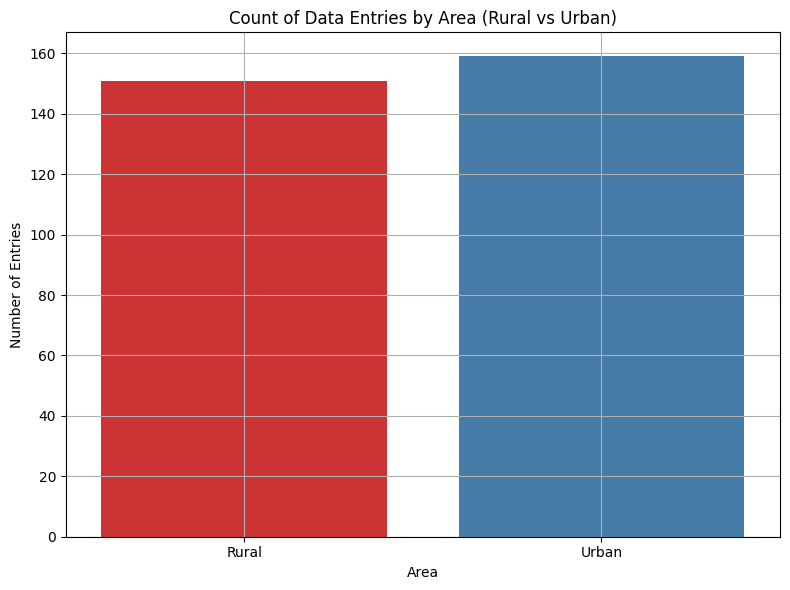

In [9]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Area', data=df_india_2020, palette='Set1')
plt.title('Count of Data Entries by Area (Rural vs Urban)')
plt.xlabel('Area')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

## Bar Plot of Average Unemployment Rate by Region

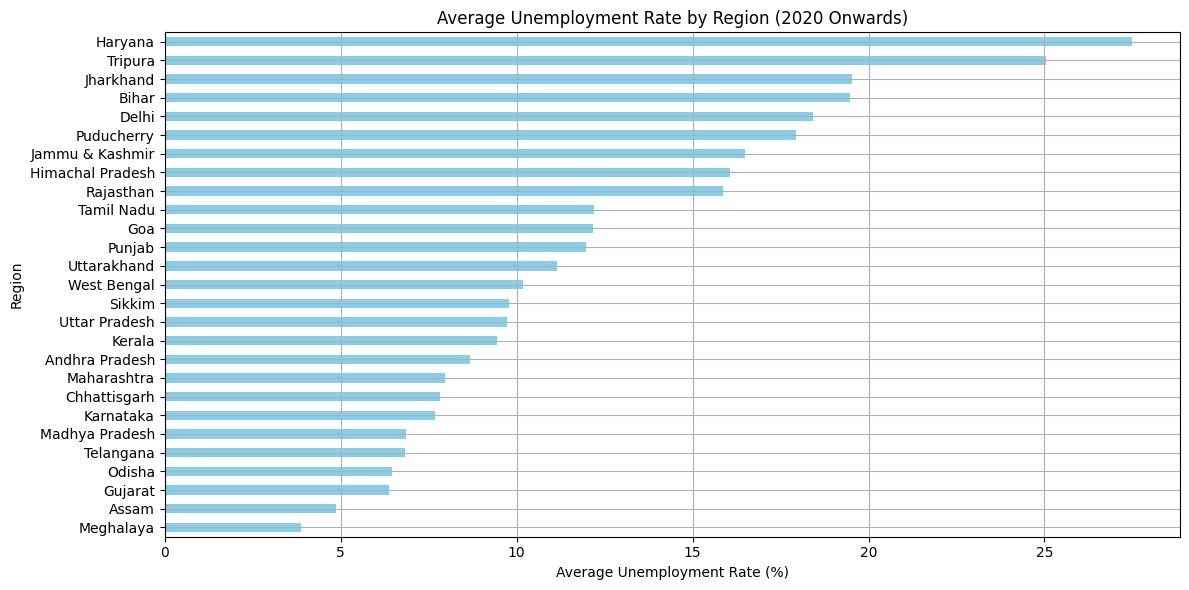

In [10]:
average_unemployment = df_rate_2020_filtered.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_unemployment.plot(kind='barh', color='skyblue')
plt.title('Average Unemployment Rate by Region (2020 Onwards)')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()

## Box plot of unemployment rates by region

<Figure size 1200x600 with 0 Axes>

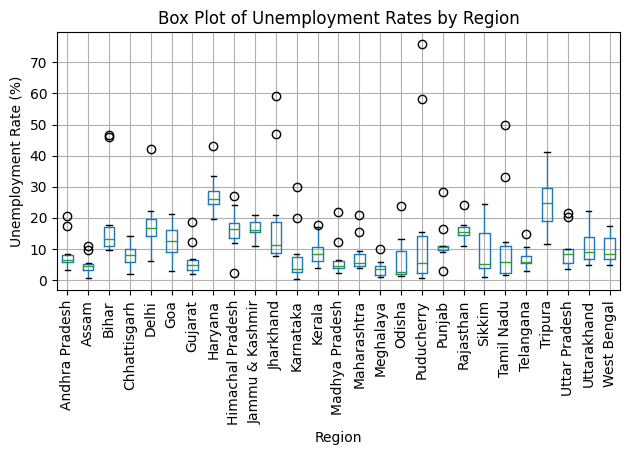

In [11]:
plt.figure(figsize=(12, 6))
df_rate_2020_filtered.boxplot(column='Estimated Unemployment Rate (%)', by='Region', rot=90)
plt.title('Box Plot of Unemployment Rates by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Heatmap of Unemployment Rates by Region and Date

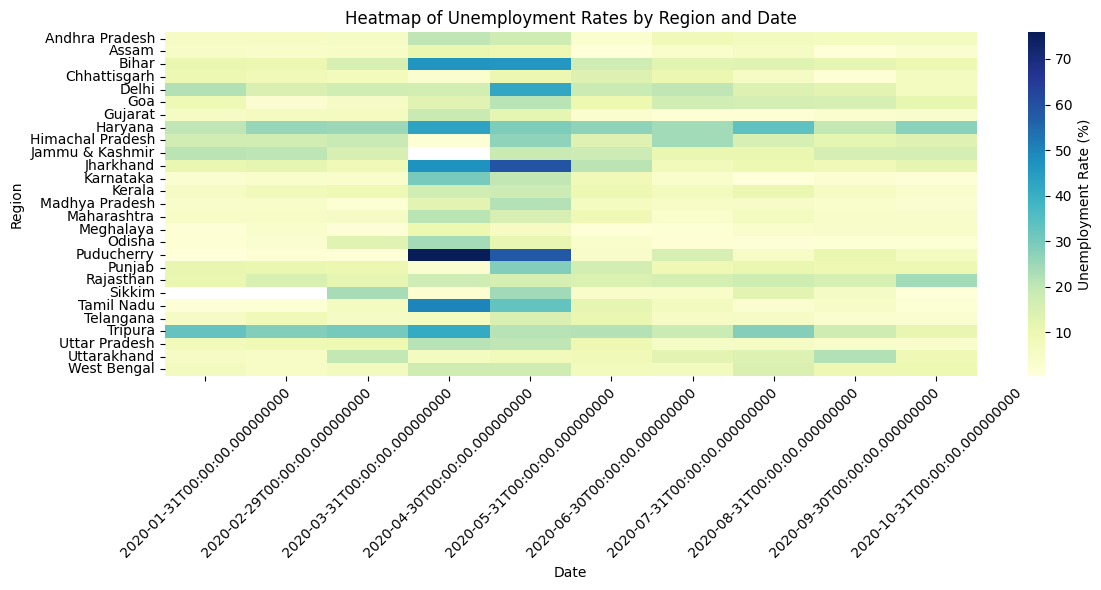

In [12]:
import seaborn as sns
import numpy as np

heatmap_data = df_rate_2020_filtered.pivot_table(values='Estimated Unemployment Rate (%)', 
                                                 index='Date', columns='Region')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title('Heatmap of Unemployment Rates by Region and Date')
plt.xlabel('Date')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count of Data Entries per Region

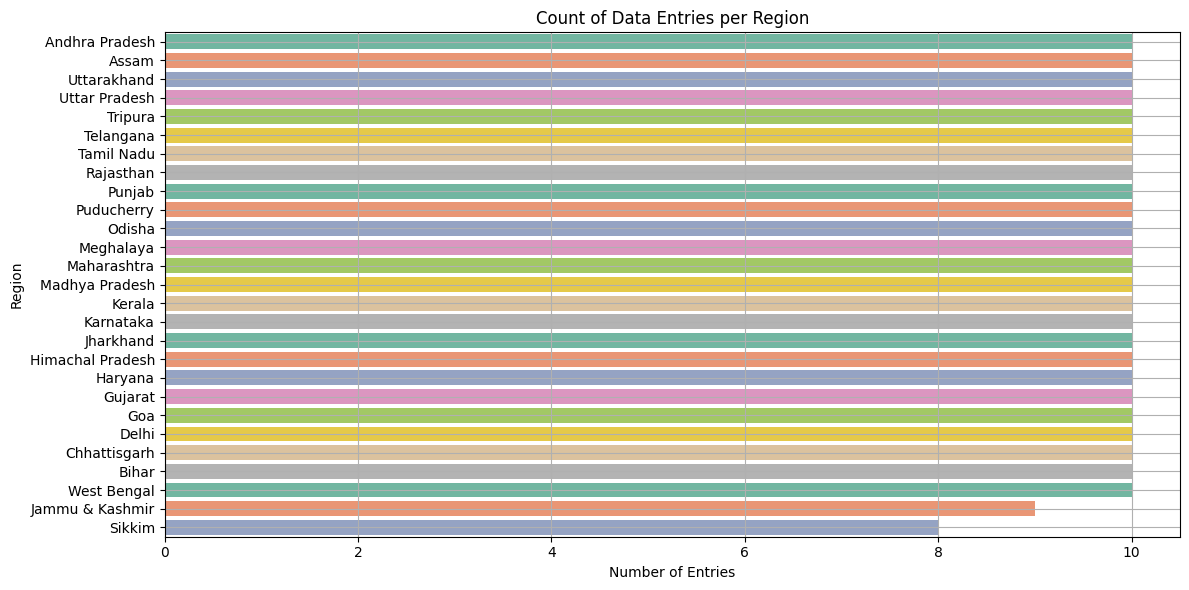

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.countplot(y='Region', data=df_rate_2020_filtered, order=df_rate_2020_filtered['Region'].value_counts().index, palette='Set2')
plt.title('Count of Data Entries per Region')
plt.xlabel('Number of Entries')
plt.ylabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()

## Count of Data Entries per Date

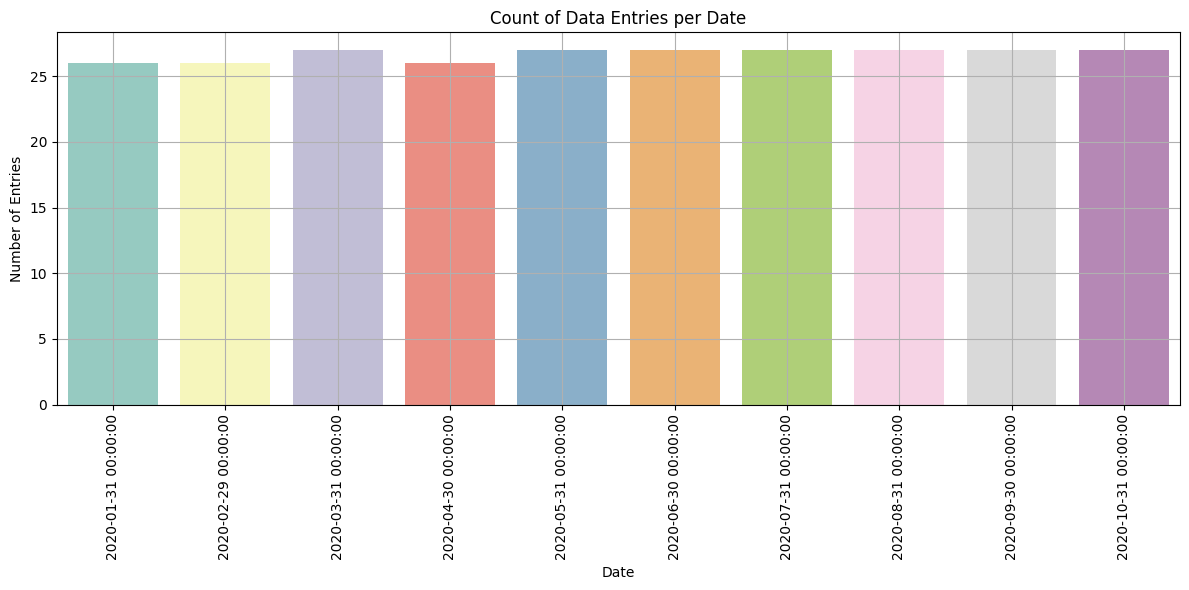

In [14]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Date', data=df_rate_2020_filtered, palette='Set3')
plt.xticks(rotation=90)
plt.title('Count of Data Entries per Date')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

## Count of Data Entries by Frequency

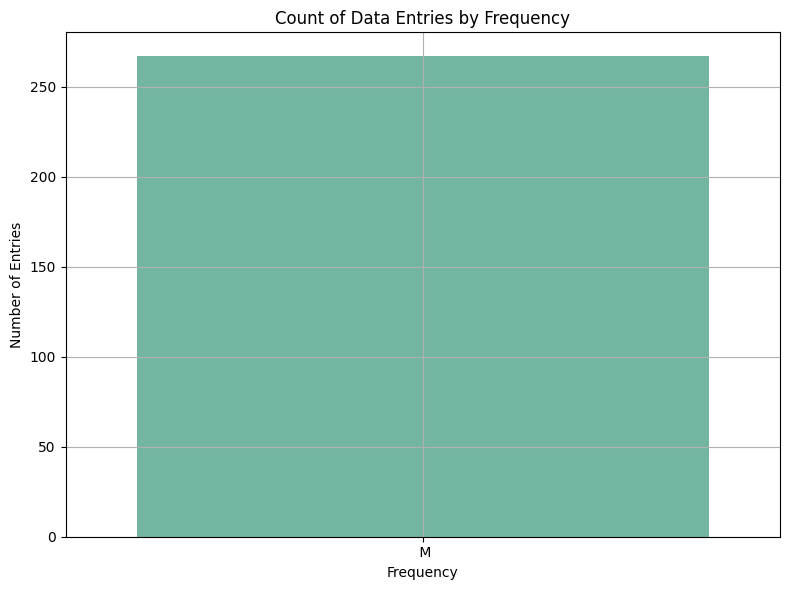

In [15]:
plt.figure(figsize=(8, 6))

sns.countplot(x='Frequency', data=df_rate_2020_filtered, palette='Set2')
plt.title('Count of Data Entries by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

## Scatter plots

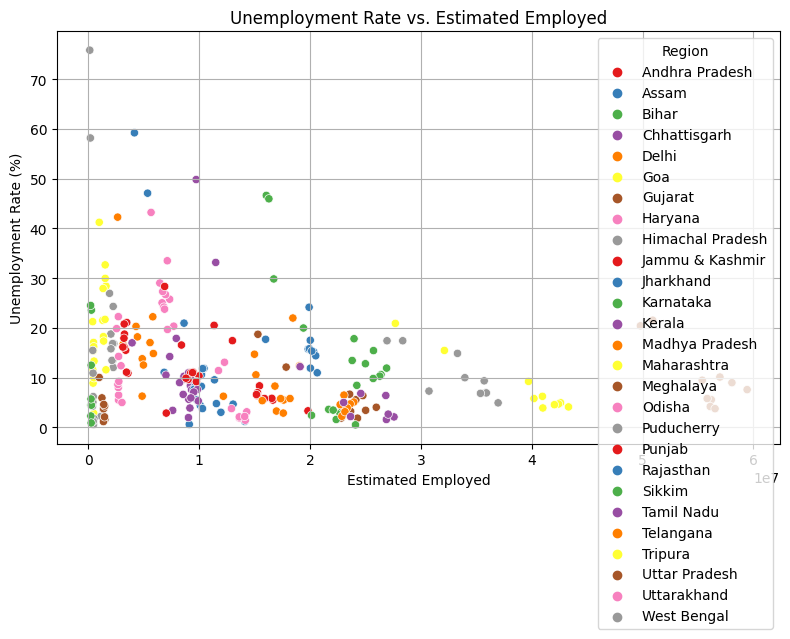

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', data=df_rate_2020_filtered, hue='Region', palette='Set1')
plt.title('Unemployment Rate vs. Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

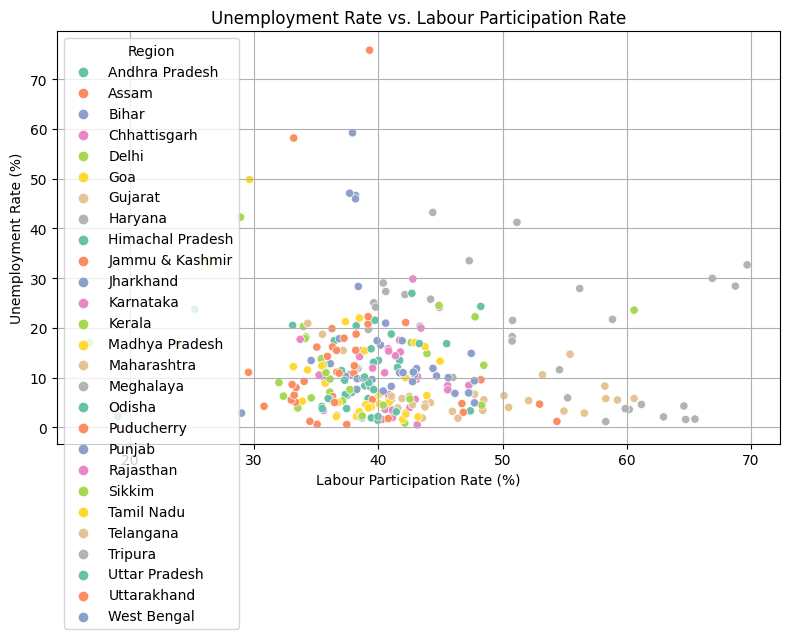

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=df_rate_2020_filtered, hue='Region', palette='Set2')
plt.title('Unemployment Rate vs. Labour Participation Rate')
plt.xlabel('Labour Participation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

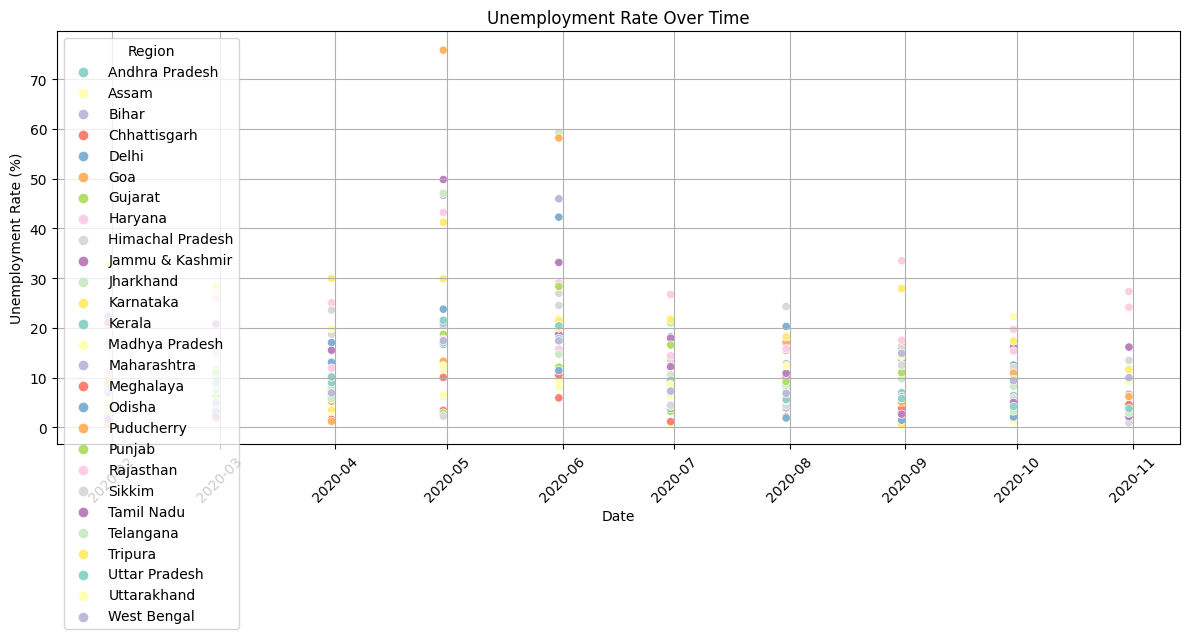

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Estimated Unemployment Rate (%)', data=df_rate_2020_filtered, hue='Region', palette='Set3')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

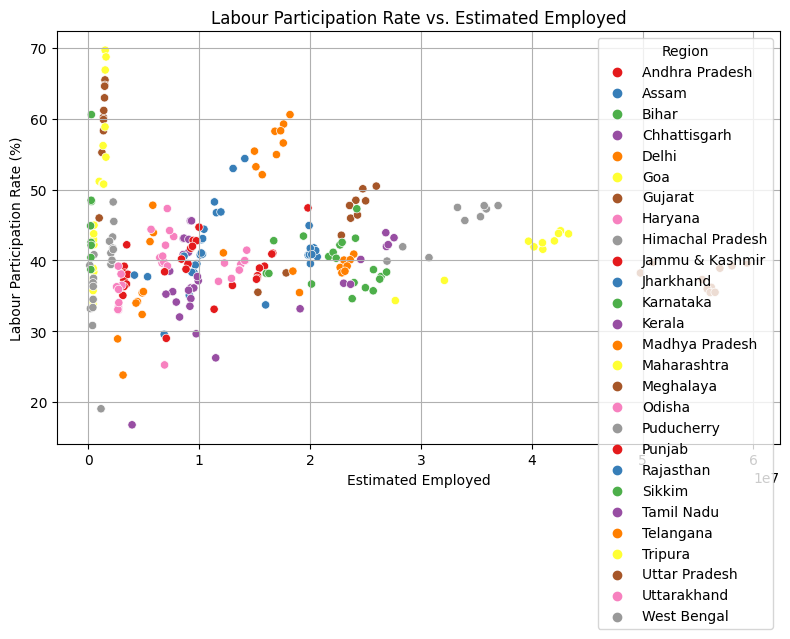

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=df_rate_2020_filtered, hue='Region', palette='Set1')
plt.title('Labour Participation Rate vs. Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Labour Participation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Violin plots

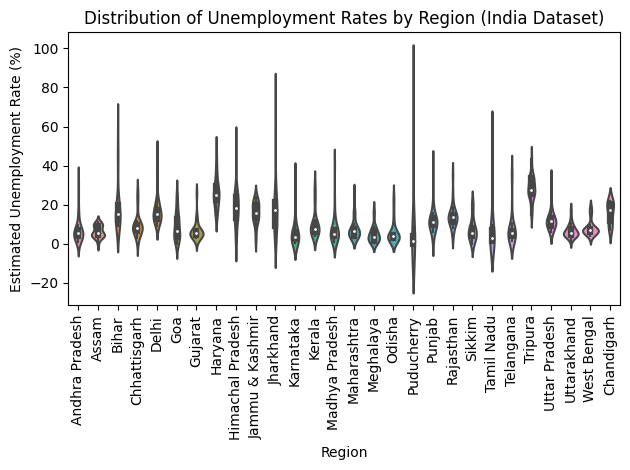

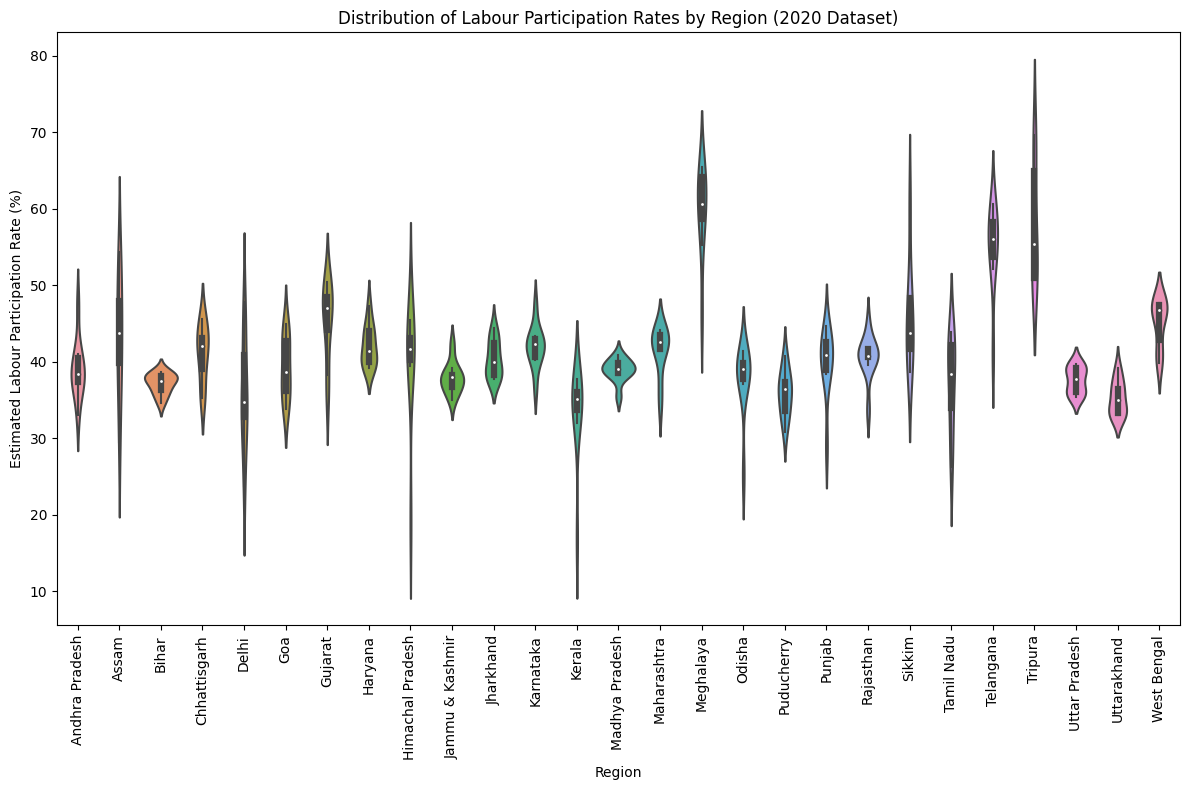

In [20]:
# Violin plot for 'Unemployment Rate (%)' by 'Region' for df_india
sns.violinplot(x='Region', y='Estimated Unemployment Rate (%)', data=df_india)
plt.title('Distribution of Unemployment Rates by Region (India Dataset)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
# Violin plot for 'Labour Participation Rate (%)' by 'Region' for df_rate_2020
plt.figure(figsize=(12, 8))
sns.violinplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df_rate_2020)
plt.title('Distribution of Labour Participation Rates by Region (2020 Dataset)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Time series

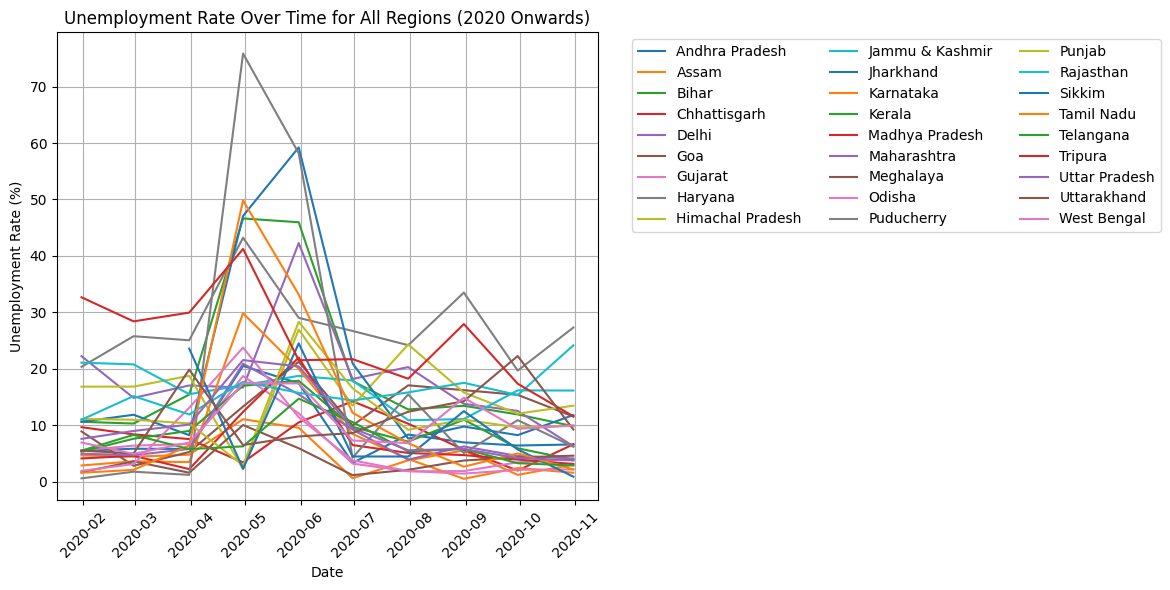

In [21]:
# Plot unemployment rate over time for all regions
plt.figure(figsize=(12, 6))
regions = df_rate_2020_filtered['Region'].unique()
for region in regions:
    region_data = df_rate_2020_filtered[df_rate_2020_filtered['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)
plt.title('Unemployment Rate Over Time for All Regions (2020 Onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(ncol=3, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

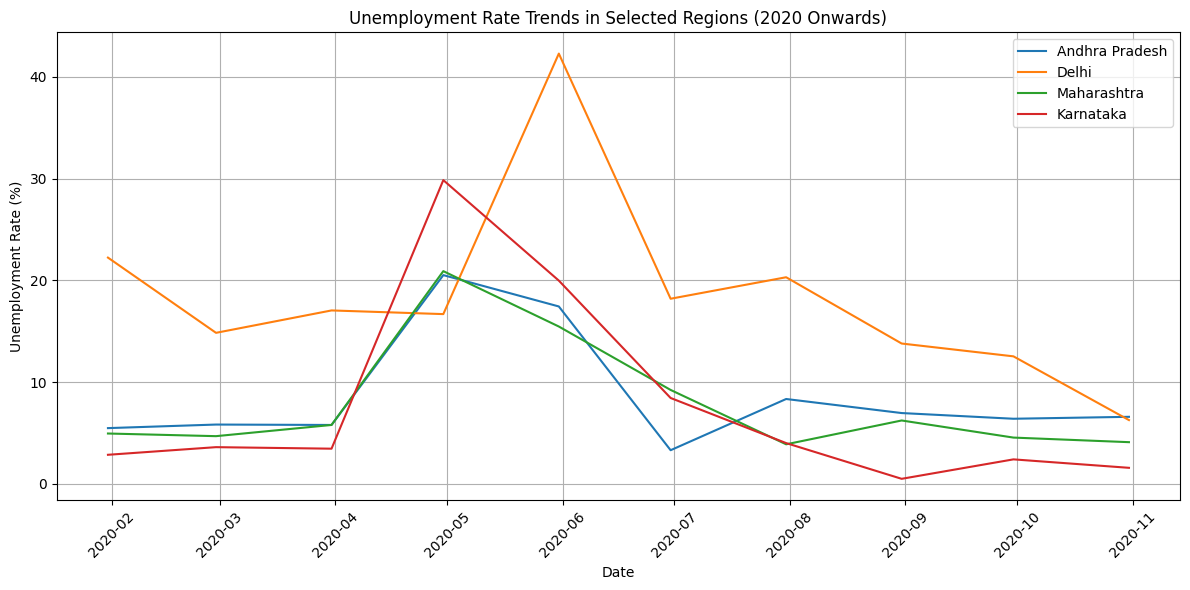

In [22]:
# Plot unemployment trends for a few regions
regions_to_plot = ['Andhra Pradesh', 'Delhi', 'Maharashtra', 'Karnataka']

plt.figure(figsize=(12, 6))

for region in regions_to_plot:
    region_data = df_rate_2020_filtered[df_rate_2020_filtered['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)
plt.title('Unemployment Rate Trends in Selected Regions (2020 Onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

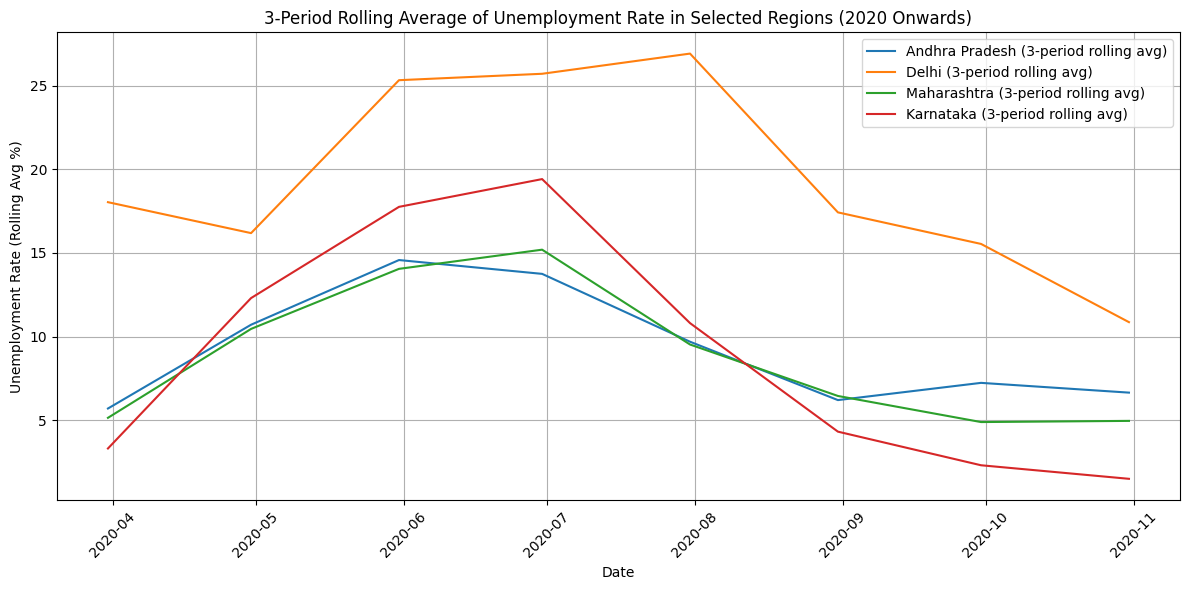

In [23]:
plt.figure(figsize=(12, 6))

for region in regions_to_plot:
    region_data = df_rate_2020_filtered[df_rate_2020_filtered['Region'] == region]
    region_data['Rolling Avg'] = region_data['Estimated Unemployment Rate (%)'].rolling(window=3).mean()  # 3-period rolling avg
    plt.plot(region_data['Date'], region_data['Rolling Avg'], label=f'{region} (3-period rolling avg)')

plt.title('3-Period Rolling Average of Unemployment Rate in Selected Regions (2020 Onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (Rolling Avg %)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
